In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import fasttext
import numpy as np

## 1. Visualization of Word Embeddings

In [2]:
def read_wordlist(filepath):
    words = []
    with open(filepath, "r") as file:
        for word in file:
            words.append(word.rstrip())
    return words


def read_wordlists(categories):
    folder_path = "/pylon5/sez3a3p/yyn1228/Dorothy-Ymir/model/FastText/wordlists/nouns/{}.txt"
    word_dict = dict()
    for category in categories:
        word_dict[category] = read_wordlist(folder_path.format(category))
    return word_dict


def print_word_dict_counts(word_dict):
    total = 0
    for category in word_dict:
        category_word_count = len(word_dict[category])
        print("{}: {}".format(category, category_word_count))
        total += category_word_count
    print("total: {}".format(total))
    
    
def get_long_embeddings(model, word_dict):
    embeddings = []
    for category in word_dict:
        embeddings.append([category, [], []])
        for word in word_dict[category]:
            if word in model.words:
                embeddings[-1][1].append(word)
                embeddings[-1][2].append(model.get_word_vector(word))
    return embeddings


def get_embedding_matrix(embeddings):
    embedding_matrix = []
    for category in embeddings:
        for embedding in category[-1]:
            embedding_matrix.append(embedding)
    return np.array(embedding_matrix)


def read_short_embeddings(long_embeddings, short_embedding_matrix):
    i = 0
    short_embeddings = []
    for category, words, embeddings in long_embeddings:
        short_embeddings.append([category, words, []])
        for word in words:
            short_embeddings[-1][2].append(short_embedding_matrix[i])
            i += 1
    return short_embeddings


def tsne_embeddings(long_embedding_matrix, tsne_model):
    short_embedding_matrix = tsne_model.fit_transform(long_embedding_matrix)
    return short_embedding_matrix


def tsne_plot(short_embeddings):

    plt.figure(figsize=(16, 16)) 
    
    for category, words, embeddings in short_embeddings:
        x = []
        y = []
        for embedding in embeddings:
            x.append(embedding[0])
            y.append(embedding[1])
        
        plt.scatter(x, y, label=category)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.show()
    
    
def plot_tsne_embedding(model, tsne_model, word_dict):
    long_embeddings = get_long_embeddings(model, word_dict)
    long_embedding_matrix = get_embedding_matrix(long_embeddings)
    short_embedding_matrix = tsne_embeddings(long_embedding_matrix, tsne_model)
    short_embeddings = read_short_embeddings(long_embeddings, short_embedding_matrix)
    tsne_plot(short_embeddings)

In [3]:
model_path = "/pylon5/sez3a3p/yyn1228/Dorothy-Ymir/model/FastText/summary_all_subclass/fasttext_model.bin"
model = fasttext.load_model(model_path)

In [30]:
categories = [
    "physics", 
    #"phones", 
    "food", 
    #"automobiles", 
    "architecture", 
    "web_development",
]

In [31]:
word_dict = read_wordlists(categories)

In [32]:
print_word_dict_counts(word_dict)

physics: 63
food: 98
architecture: 35
web_development: 65
total: 261


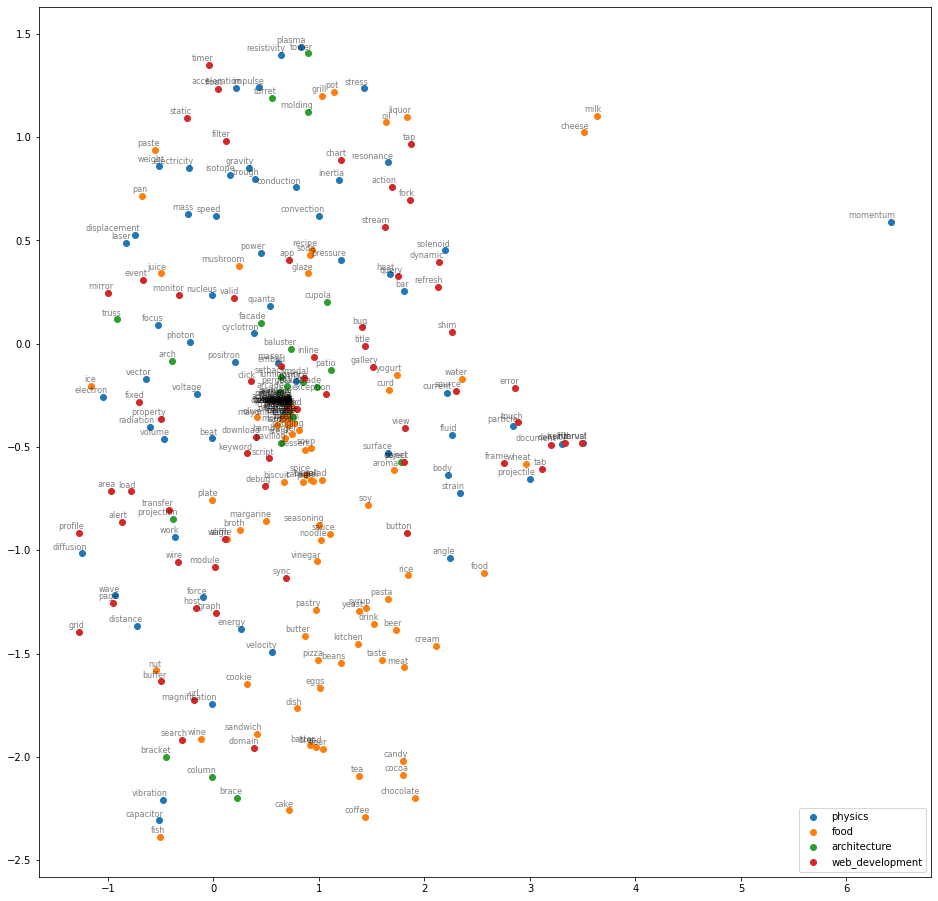

In [33]:
tsne_model = TSNE(perplexity=100, n_components=2, init='pca', n_iter=3500, random_state=15213)
plot_tsne_embedding(model, tsne_model, word_dict)

## 2. Visualization of Document Embeddings

In [10]:
def split_label(line):
    tokens = line.rstrip().split(" ")
    for i, token in enumerate(tokens):
        if "__label__" not in token:
            break
    first_label = tokens[0][9:].split("--")[0]
    return " ".join(tokens[i:]), first_label

def get_long_embeddings_sentence(model, json_path, n):
    
    labels = []
    embeddings = []
    
    with open(json_path, 'r') as file:  
        for i, line in enumerate(file):
            line, label = split_label(line)
            embedding = model.get_sentence_vector(line)
            labels.append(label)
            embeddings.append(embedding)
            if i >= n - 1:
                break
            
    return labels, np.array(embeddings)
    

def tsne_embeddings(long_embedding_matrix, tsne_model):
    short_embedding_matrix = tsne_model.fit_transform(long_embedding_matrix)
    return short_embedding_matrix


def get_short_embedding_dict(labels, short_embedding_matrix):
    embedding_dict = dict()
    for label, short_embedding in zip(labels, short_embedding_matrix):
        if label not in embedding_dict:
            embedding_dict[label] = []
        embedding_dict[label].append(short_embedding)
    return embedding_dict

def tsne_plot_sentence(embedding_dict):

    plt.figure(figsize=(16, 16)) 
    
    for category, embeddings in embedding_dict.items():
        x = []
        y = []
        for embedding in embeddings:
            x.append(embedding[0])
            y.append(embedding[1])
        
        plt.scatter(x, y, label=category)
    plt.legend(loc=4)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
    
def plot_tsne_embedding_sentence(model, tsne_model, json_path, n):
    
    labels, long_embedding_matrix = get_long_embeddings_sentence(model, json_path, n)
    short_embedding_matrix = tsne_embeddings(long_embedding_matrix, tsne_model)
    embedding_dict = get_short_embedding_dict(labels, short_embedding_matrix)
    print_word_dict_counts(embedding_dict)
    tsne_plot_sentence(embedding_dict)

In [4]:
model_path = "/pylon5/sez3a3p/yyn1228/Dorothy-Ymir/model/FastText/summary_all_section/fasttext_model.bin"
model = fasttext.load_model(model_path)

H: 2132
G: 2111
A: 1264
C: 1079
F: 855
D: 105
Y: 745
B: 1397
E: 312
total: 10000


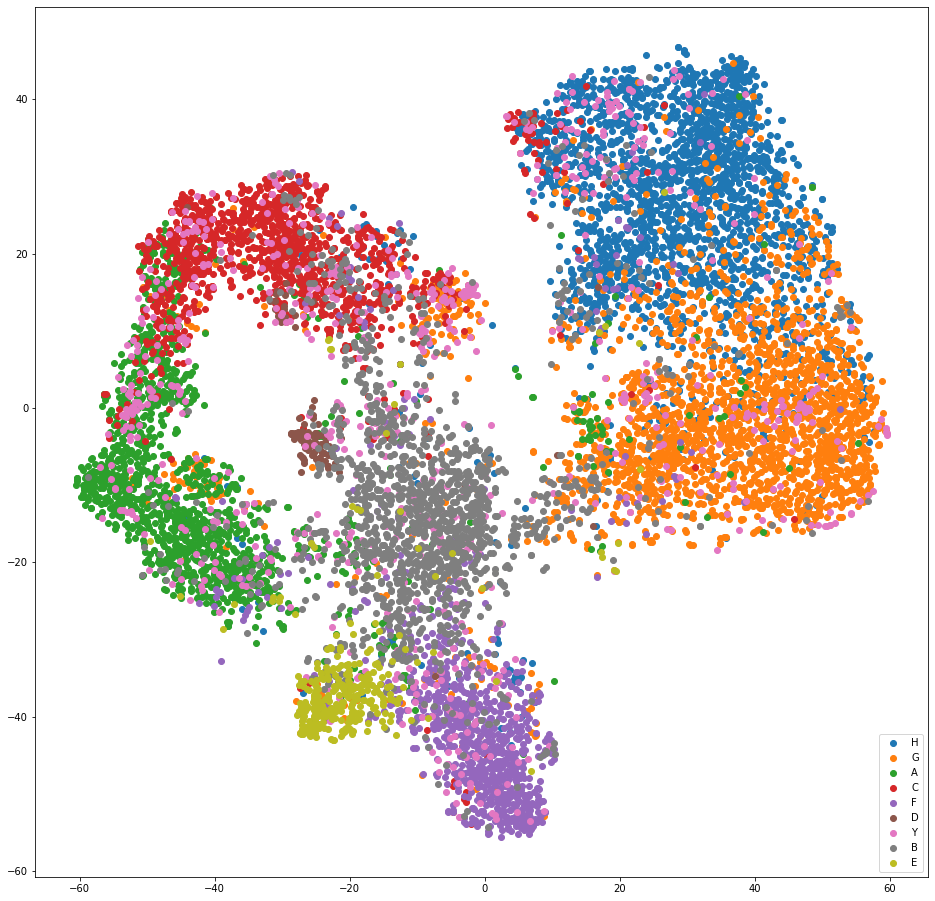

In [7]:
tsne_model = TSNE(perplexity=100, n_components=2, init='pca', n_iter=3500, random_state=15213)
json_path = "/pylon5/sez3a3p/yyn1228/data/all_summary_fasttext/valid_small.json"
plot_tsne_embedding_sentence(model, tsne_model, json_path, 10000)

H: 197
G: 213
A: 124
C: 116
F: 87
D: 9
Y: 68
B: 153
E: 33
total: 1000


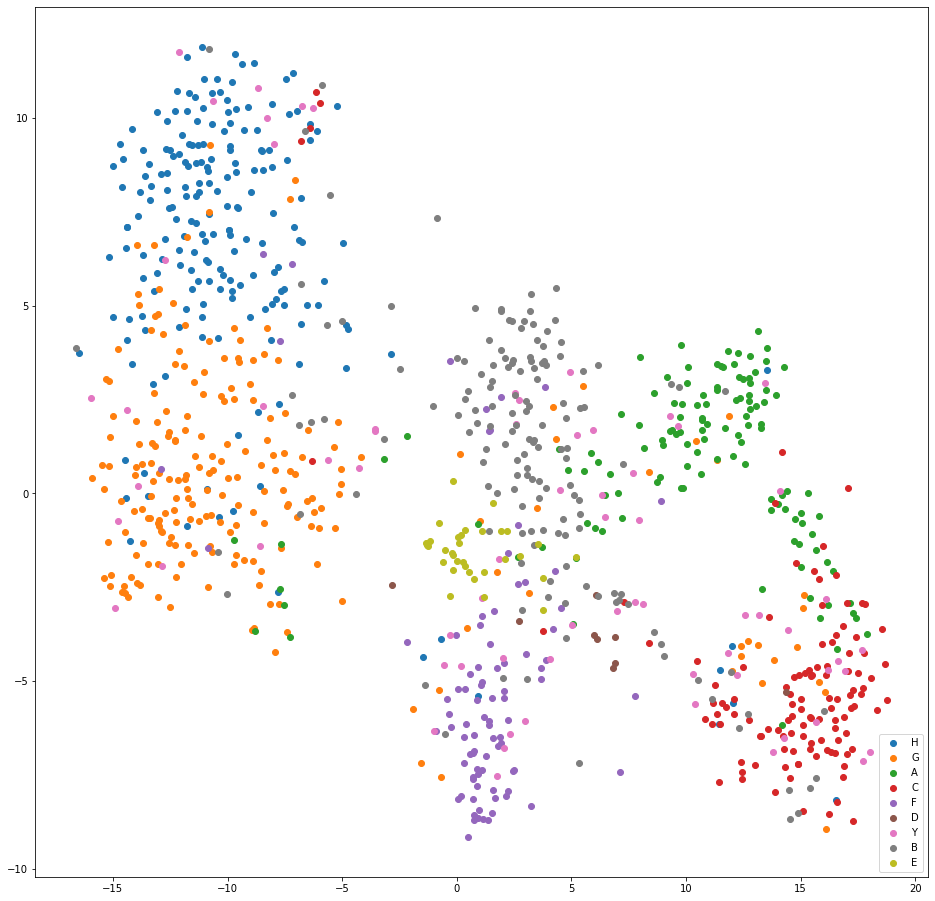

In [8]:
tsne_model = TSNE(perplexity=100, n_components=2, init='pca', n_iter=3500, random_state=15213)
json_path = "/pylon5/sez3a3p/yyn1228/data/all_summary_fasttext/valid_small.json"
plot_tsne_embedding_sentence(model, tsne_model, json_path, 1000)